<a href="https://colab.research.google.com/github/janmlew/TensorFlow/blob/master/TensorFlow_C1W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My project on DeepLearning.AI TensorFlow Developer Professional Certificate.

Course 1., week 3.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the *shallow* model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Train the model
print(f'\nSHALLOW MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nSHALLOW MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


SHALLOW MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4966 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3739 - accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.8908

SHALLOW MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8568
[0.3879927098751068, 0.8568000197410583]


In [4]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [5]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4698 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3168 - accuracy: 0.8835
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.8993
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2420 - accuracy: 0.9103
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2179 - accuracy: 0.9185

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9066
[0.2598164975643158, 0.9065999984741211]


In [7]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [8]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4463 - accuracy: 0.8382
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.8896
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2557 - accuracy: 0.9053
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2222 - accuracy: 0.9168
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1953 - accuracy: 0.9268

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2767 - accuracy: 0.8992
[0.2766815423965454, 0.8992000222206116]


In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 19ms/step


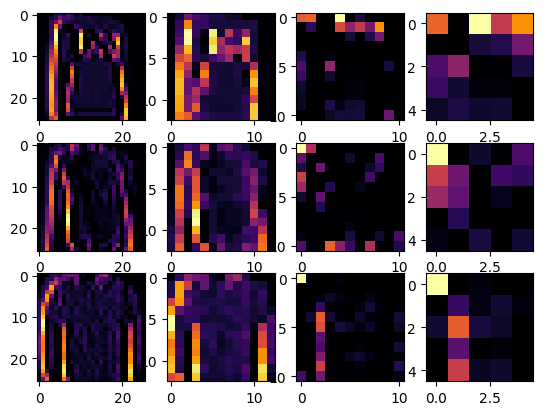

In [12]:
f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 1
SECOND_IMAGE = 16
THIRD_IMAGE = 20
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)